In [516]:
#Necessary imports
import pandas as pd
import numpy as np
from tqdm import tqdm
import tweepy
from datetime import date
import pickle 
import time
from textnets import Corpus, Textnet
import matplotlib.pyplot as plt

In [517]:
tweets = pd.read_csv("data/tweets_subset", index_col=0)

In [518]:
network_df = tweets[["screen_name", "p.party", "m.name", "hashtags", "full_text", "created_at"]]
#Subset bushfire tweets
network_df = network_df.loc[(network_df["full_text"].str.contains("burnt|burn|fire|Fire|black summer|bushfire|Bushfire|Bush fire|bush fire|bush-fire|Bush-fire")) & 
             (network_df["created_at"] > "2019-06-01") & (network_df["created_at"] < "2020-04-01")].reset_index(drop = True)

In [515]:
network_df["hashtags"] = network_df["hashtags"].apply(eval).apply(' '.join)
network_df["hashashtag"] = network_df["hashtags"].apply(lambda x: 1 if len(x) > 0 else 0)
network_df = network_df.loc[network_df["hashashtag"] == 1].reset_index(drop = True)

In [519]:
#network_df = network_df.drop(columns=["hashashtag"])

network_df = (network_df.set_index(['screen_name', 'created_at',"p.party", "m.name", "full_text"])
       .apply(lambda x: x.str.split(' ').explode())
       .reset_index())  

## Hashtag Network

In [520]:
network_df = network_df.set_index("m.name")

In [479]:
corpus = Corpus.from_df(network_df, doc_col='hashtags', lang='en')

In [480]:
tn = Textnet(corpus.tokenized(), min_docs=3, doc_attrs=network_df[['p.party']].to_dict())

In [481]:
hashtag = tn.project(node_type='term')

In [482]:
hashtag = hashtag.degree

In [495]:
plot = tn.plot(label_term_nodes=True,
        label_doc_nodes=True,
        vertex_label_size=5,
        vertex_color=['gray' if v['p.party'] is None 
                      else ('dodgerblue' if v['p.party'] == 'Liberal Party of Australia'
                      else ('indianred' if v['p.party'] == 'Australian Labor Party' 
                      else ('lightgreen' if v['p.party'] == 'Australian Greens' 
                      else ('gold' if v['p.party'] == 'The Nationals' 
                      else ('darkorange' if v['p.party'] == 'Center Alliance' 
                      else ('pink' if v['p.party'] == 'Liberal National Party of Queensland'
                      else  'purple'))))))
                      for v in tn.vs],
        vertex_shape=['circle' if v['p.party'] is None 
                      else 'triangle' if v['p.party'] == 'Liberal Party of Australia'
                      else 'triangle-down'
                      for v in tn.vs],
        scale_nodes_by = 'degree')

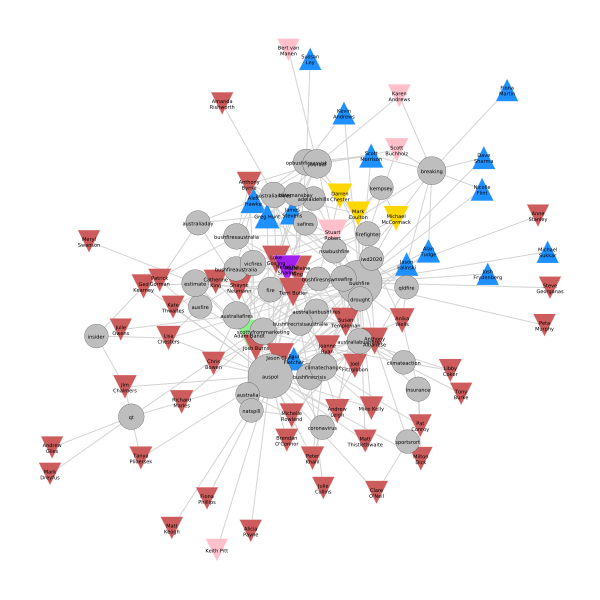

In [496]:
plot

In [490]:
plot.save("plot.jpeg")

In [501]:
print(tn.degree.sort_values(ascending=False)[:20].to_markdown())

|                     |   0 |
|:--------------------|----:|
| bushfire            |  37 |
| auspol              |  36 |
| Adam Bandt          |  14 |
| Stuart Robert       |  13 |
| Madeleine King      |  12 |
| Terri Butler        |  11 |
| Susan Templeman     |  11 |
| youradf             |  11 |
| breaking            |  10 |
| Jason Clare         |  10 |
| Luke Gosling        |  10 |
| Rebekha Sharkie     |   9 |
| climatechange       |   9 |
| australiafires      |   9 |
| Anthony Albanese    |   8 |
| scottyfrommarketing |   8 |
| estimate            |   8 |
| bushfirecrisis      |   7 |
| Josh Burns          |   7 |
| Shayne Neumann      |   7 |


## Semantical Network

In [521]:
corpus = Corpus.from_df(network_df, doc_col='full_text', lang='en')

In [554]:
tn = Textnet(corpus.tokenized(), min_docs=1, doc_attrs=network_df[['p.party']].to_dict())

In [542]:
plot = tn.plot(label_term_nodes=True,
        label_doc_nodes=True,
        vertex_label_size=5,
        alpha = 0.05,
        vertex_color=['gray' if v['p.party'] is None 
                      else ('dodgerblue' if v['p.party'] == 'Liberal Party of Australia'
                      else ('indianred' if v['p.party'] == 'Australian Labor Party' 
                      else ('lightgreen' if v['p.party'] == 'Australian Greens' 
                      else ('gold' if v['p.party'] == 'The Nationals' 
                      else ('darkorange' if v['p.party'] == 'Center Alliance' 
                      else ('pink' if v['p.party'] == 'Liberal National Party of Queensland'
                      else  'purple'))))))
                      for v in tn.vs],
        vertex_shape=['circle' if v['p.party'] is None 
                      else 'triangle' if v['p.party'] == 'Liberal Party of Australia'
                      else 'triangle-down'
                      for v in tn.vs],
        )

In [543]:
plot

In [555]:
mps = tn.project(node_type='doc')
#words = tn.project(node_type='term')

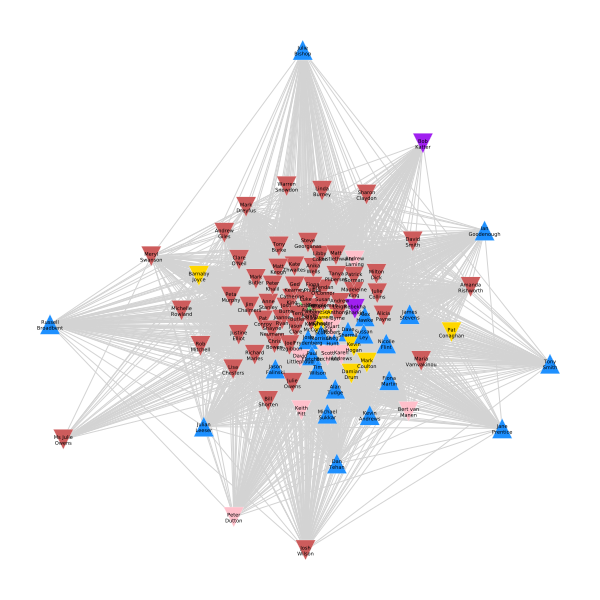

In [556]:
mps.plot(label_nodes=True,
        vertex_label_size=5,
        vertex_color=['gray' if v['p.party'] is None 
                      else ('dodgerblue' if v['p.party'] == 'Liberal Party of Australia'
                      else ('indianred' if v['p.party'] == 'Australian Labor Party' 
                      else ('lightgreen' if v['p.party'] == 'Australian Greens' 
                      else ('gold' if v['p.party'] == 'The Nationals' 
                      else ('darkorange' if v['p.party'] == 'Center Alliance' 
                      else ('pink' if v['p.party'] == 'Liberal National Party of Queensland'
                      else  'purple'))))))
                      for v in tn.vs],
        vertex_shape=['circle' if v['p.party'] is None 
                      else 'triangle' if v['p.party'] == 'Liberal Party of Australia'
                      else 'triangle-down'
                      for v in tn.vs],)